## **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing the liabaries

In [44]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Reading the data

In [45]:
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


### Reading the first five rows of data by head() function

In [46]:
Data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Reading the number of rows and columns in the data using shape() function

In [47]:
Data.shape

(25, 2)

### Reading the heading names of the columns

In [48]:
Data.columns

Index(['Hours', 'Scores'], dtype='object')

### Finding the relation between data by plotting

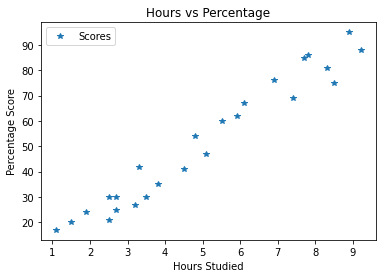

In [49]:
Data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### The graph shows the straight line which moves in upwards direction and there is a linear regression betwwen the numbers of hours studied and percentage of the score .

### **Splitting the data**

For testing the Data , it is necessary to split the data into the independent and dependent columns.

In [50]:
X = Data.iloc[:, :-1].values  #independent
Y = Data.iloc[:, 1].values    #dependent

In [51]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [52]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

The next step is to split this data into training and test sets and by using Scikit-Learn's built-in train_test_split() method

In [53]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [54]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [55]:
 X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [56]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [57]:
 Y_test

array([20, 27, 69, 30, 62], dtype=int64)

### **Training the Model**

On spliting the data ,the next step is to train the model to recieve the better results , we import thelinear regression to train the model. 

In [58]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(X_train, Y_train) 

print("The Training is complete.")

The Training is complete.


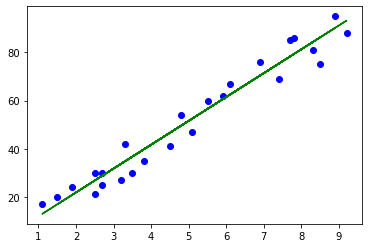

In [59]:
line = LR.coef_*X+LR.intercept_      #Plotting the regression line

plt.scatter(X, Y, color='blue')                                  #Plotting the test data
plt.plot(X, line, color='green');
plt.show()

### Visualize The Training Set Results

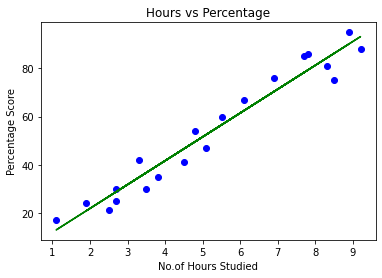

In [60]:
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,LR.predict(X_train),color='green')
plt.title('Hours vs Percentage')
plt.xlabel('No.of Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **Making Predictions**

In [61]:
y_pred = LR.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [62]:
print(X_test) 
Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [63]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  # On Comparing
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/day?

In [64]:
hours = 9.25
pred = LR.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737539


### **On Evaluating the Model**

The final step is to evaluate the performance of the algorithmn .This step is necessary to compare the different algorithmn perform on a particular dataset. 
For simplicity here, we have chosen the mean square error , There are many such metrics.

In [65]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
